# Probability Distribution Exercises
<hr style="border:2px solid blue"> </hr>


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [3]:
# Binomial Distributions: All about determining a binary outcome of an event. Success vs Failure
# Uniform Distributions: Have equal likelyhoods among all outcomes, like a deck of cards
# Normal Distributions: Model a continuous random variable
# Poisson Distributions: A certain amount of events occuring over a time interval

### 1. A bank found that the average number of cars waiting during the noon hour at a drive-up window follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer these questions concerning the probability of cars waiting at the drive-up window.


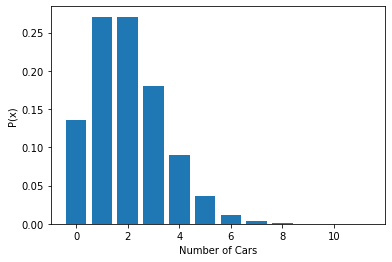

In [4]:
# This is a Poisson Distribution because it is over a time interval
λ = 2 # cars at noon hour

x = np.arange(0,12)
y = stats.poisson(λ).pmf(x)

plt.bar(x,y)
plt.xlabel('Number of Cars')
plt.ylabel("P(x)");

### What is the probability that no cars drive up in the noon hour?


In [5]:
no_cars = stats.poisson(λ).pmf(0)
print("The probability that no cars drive up in the noon hour is" , round(no_cars*100, 1) , "%")

The probability that no cars drive up in the noon hour is 13.5 %


### What is the probability that 3 or more cars come through the drive through?


In [6]:
three_or_more = stats.poisson(λ).sf(2)
print("The probability that 3 or more cars come through the drive through is" , round(three_or_more*100) , "%")

The probability that 3 or more cars come through the drive through is 32 %


### How likely is it that the drive through gets at least 1 car?

In [7]:
at_least_one = stats.poisson(λ).sf(0)
print("The probability that the drive through gets at least 1 car is" , round(at_least_one*100) , "%")

The probability that the drive through gets at least 1 car is 86 %


### 2. Grades of State University graduates are normally distributed with a mean of 3.0 and a standard deviation of .3. Calculate the following:

### What grade point average is required to be in the top 5% of the graduating class?


In [8]:
μ = 3.0
σ = 0.3

gpa = stats.norm( μ , σ )

gpa.isf(.05)

print("You need a" , round(gpa.isf(.05) , 2) , "GPA to be in the top 5%.")

You need a 3.49 GPA to be in the top 5%.


### What GPA constitutes the bottom 15% of the class?


In [9]:
gpa.ppf(.15)

print("You are in the bottom 15% if you have a GPA of" , round(gpa.ppf(.15) , 2) , "or lower.")

You are in the bottom 15% if you have a GPA of 2.69 or lower.


### An eccentric alumnus left scholarship money for students in the third decile from the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average qualify for this scholarship?


In [10]:
# Third decile is 20-30 percentiles!
# Decile 1: 0-10
# Decile 2: 10-20
# Decile 3: 20-30

gpa.ppf(.30)
print("Yes, you would need a GPA of", round(gpa.ppf(.30), 2), "or lower to qualify.")

Yes, you would need a GPA of 2.84 or lower to qualify.


In [11]:
# Instructor Solution
gpa.ppf([.2, .30])

array([2.74751363, 2.84267985])

### If I have a GPA of 3.5, what percentile am I in?

In [12]:
gpa.cdf(3.5)
print("A GPA of 3.5 would be in the", int(gpa.cdf(3.5) * 100), "percentile.")

A GPA of 3.5 would be in the 95 percentile.


### 3. A marketing website has an average click-through rate of 2%. One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people or more click through?

In [13]:
# Binomial Distribution: click vs not clicked

stats.binom(4326 , .02).sf(96)

print("It is", round(stats.binom(4326 , .02).sf(96) *100, 2), "% likely that this many people or more clicked through." )

It is 13.98 % likely that this many people or more clicked through.


### 4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.

### What is the probability that at least one of your first 60 answers is correct?

In [106]:
# Hundreths place .01
# Binomial Distribution: correct answer vs not correct
# Self reminder that .sf() is exclusive, so if I want 1 or more answers I need to put 0
# Chance of choosing the right number p = 0.01

stats.binom(60, 1/100).sf(0)

print("There is a", round(stats.binom(60, 1/100).sf(0) *100, 1) , "% chance one of the 60 answers is correct.")

There is a 45.3 % chance one of the 60 answers is correct.


### 5. The codeup staff tends to get upset when the student break area is not cleaned up. Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. How likely is it that the break area gets cleaned up each day? How likely is it that it goes two days without getting cleaned up? All week?

In [125]:
## SEE INSTRUCTOR NOTE FOR FIXING ANSWERS

In [130]:
# Creating a variable for the number representing 90% of 3 cohorts with 22 students
students_visited = round(3 * 22 * .90)

# Binomial Distribution: Cleaned vs Not cleaned
stats.binom(students_visited, .03)

print("Getting Cleaned Each Day:", round(stats.binom(students_visited, .03).sf(0), 2) )
print("Two Days without cleaning:", round(stats.binom(students_visited* 2, .03).pmf(0), 2) )
print("One week without cleaning:", round(stats.binom(students_visited * 7, .03).pmf(0), 6) )


Getting Cleaned Each Day: 0.83
Two Days without cleaning: 0.03
One week without cleaning: 3e-06


Text(0.5, 0, 'Number of Times Area is Cleaned Per Day')

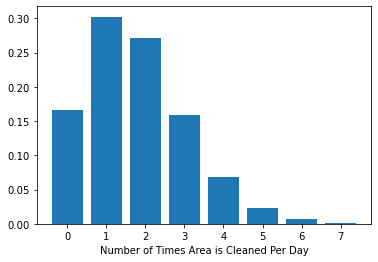

In [126]:
x = np.arange(0,8)
y = stats.binom(students_visited, .03).pmf(x)

plt.bar(x,y);
plt.xlabel("Number of Times Area is Cleaned Per Day")

### 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. After several weeks of careful observation, you notice that the average number of people in line when your lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? Assume you have one hour for lunch, and ignore travel time to and from La Panaderia.

In [68]:
μ = 15
σ = 3
# 2 minutes /person
# 10 minutes to get food after order
# 1 hour for lunch
# P(15 minutes to sit an eat)

# Let's toss those stats into a Normal Distribution
people_in_line = stats.norm(μ , σ)

# Now to set that aside and do some math. What number of people in line will give me enough time?
# 60 minutes - # people in line ordering @ 2 min each - 10 minutes waiting to get my order
# time_to_eat = 60 - (2 * 17) - 10
# Magic number is 17 people or less to have 15 minutes to eat

people_in_line.cdf(17)
print("P(15 minutes to sit and eat)=", round(people_in_line.cdf(17) , 2) )

P(15 minutes to sit and eat)= 0.75


In [131]:
#Instructor Solution
mean = 15 * 2 #minutes
std_dev= 3 * 2 #minutes

# Max time in line without being late to class = 60 - 15 - 10 - 2
stats.norm(mean,std_dev).cdf(33)

0.6914624612740131

### 7. Connect to the employees database and find the average salary of current employees, along with the standard deviation. For the following questions, calculate the answer based on modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation then compare this answer to the actual values present in the salaries dataset.

What percent of employees earn less than 60,000?

What percent of employees earn more than 95,000?

What percent of employees earn between 65,000 and 80,000?

What do the top 5% of employees make?

In [69]:
# This will be what I use every time I want to talk to a database in SQL
def get_db_url(database_name):
    from env import host, user, password
    return f'mysql+pymysql://{user}:{password}@{host}/{database_name}'

In [75]:
current_salaries = pd.read_sql("""SELECT salary FROM salaries WHERE to_date > NOW()""" , get_db_url("employees"))
current_salaries.head()

,salary
0,88958
1,72527
2,43311
3,74057
4,94692


In [82]:
# Creating my normal distribution variable
μ = current_salaries.mean()
σ = current_salaries.std()
salaries = stats.norm(μ , σ)

### What percent of employees earn less than 60,000?

In [88]:
# Because my answer is an array with only one element I'm going to pull that number out by calling that element
round(salaries.cdf(60_000)[0] , 3)

0.244

### What percent of employees earn more than 95,000?

In [87]:
round(salaries.sf(95_000)[0] , 3)

0.092

### What percent of employees earn between 65,000 and 80,000?

In [91]:
# I want to find in between, so I'm going to need to do some subtraction
big = salaries.cdf(80_000)[0]
small = salaries.cdf(65_000)[0]

round(big - small, 3)

0.335

In [133]:
#Instructor solution
np.diff(salaries.cdf([65_000, 80_000]))

0.33506056854466654

### What do the top 5% of employees make?

In [94]:
round(salaries.isf(.05)[0] , 2)

100484.64